<h1><strong>K Nearest Neighbor(KNN)<strong></h1>

<h3>1.Prepare Data(iris) And Import Packages</h3>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
dic_iris = { "SepalLengthCm" : iris["data"][:,0],
            "SepalWidthCm" : iris["data"][:,1],
            "PetalLengthCm" : iris["data"][:,2],
            "PetalWidthCm" : iris["data"][:,3],
            "Species" : iris["target"]
           }
df_iris = pd.DataFrame(dic_iris)

In [5]:
df_iris.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [6]:
df_iris_label = pd.cut(df_iris["Species"], bins=3, labels=iris["target_names"])

In [86]:
df_iris["Label"] = df_iris_label
df_iris.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [88]:
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [96]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null int32
Label            150 non-null category
dtypes: category(1), float64(4), int32(1)
memory usage: 5.5 KB


In [97]:
df_iris.groupby("Label").size()

Label
setosa        50
versicolor    50
virginica     50
dtype: int64

<h3>2.Feature Select And Create Train Test</h3>

In [101]:
feature = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
train_X = df_iris[feature]
train_Y = df_iris["Label"]

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_Y = le.fit_transform(train_Y)

In [107]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y= train_test_split(train_X, train_Y, test_size = 0.2, random_state = 42) 

<h3>3.Data Visualization</h3>

In [114]:
from pandas.plotting import parallel_coordinates # 引入pandas 多維可視化套包

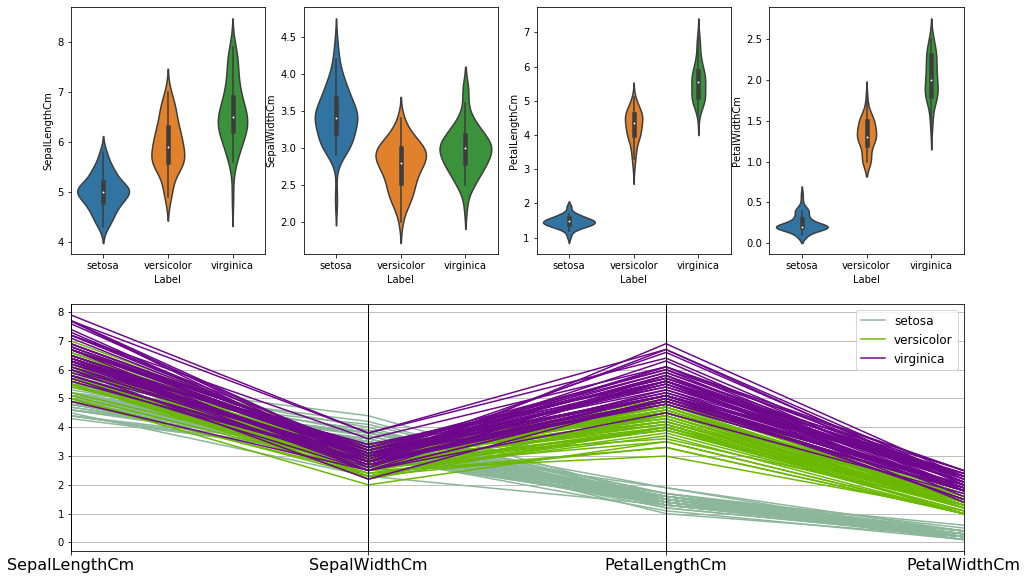

In [124]:
plt.figure(figsize=(16,10))
plt.subplot2grid((2,4),(0,0),colspan=1)
sns.violinplot(data = df_iris, x = "Label", y=feature[0])
plt.subplot2grid((2,4),(0,1),colspan=1)
sns.violinplot(data = df_iris, x = "Label", y=feature[1])
plt.subplot2grid((2,4),(0,2),colspan=1)
sns.violinplot(data = df_iris, x = "Label", y=feature[2])
plt.subplot2grid((2,4),(0,3),colspan=1)
sns.violinplot(data = df_iris, x = "Label", y=feature[3])
plt.subplot2grid((2,4),(1,0),colspan=4)
parallel_coordinates(df_iris.drop("Species", axis=1), "Label")
plt.xticks(fontsize = 16)
plt.legend(fontsize = 12)
plt.show()

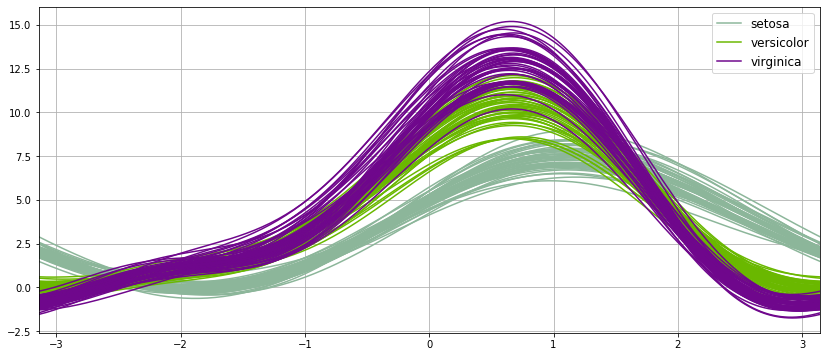

In [127]:
plt.figure(figsize=(14,6))
pd.plotting.andrews_curves(df_iris.drop("Species", axis=1), "Label")
plt.legend(fontsize = 12)
plt.show()

<Figure size 864x864 with 0 Axes>

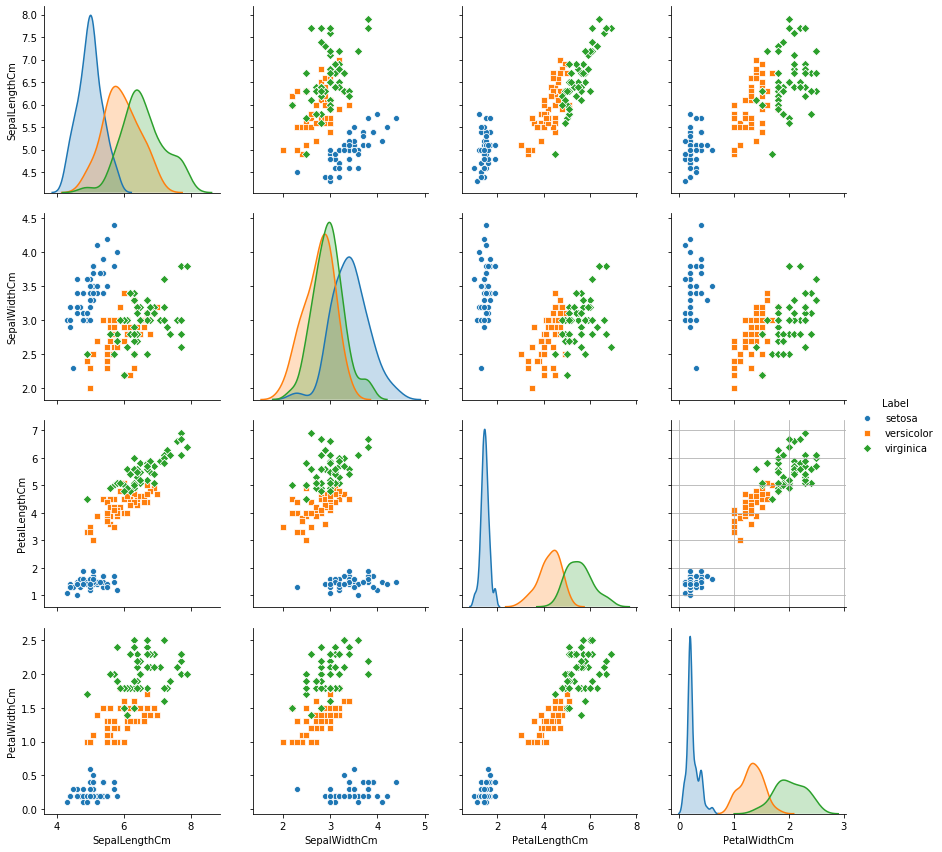

In [148]:
plt.figure(figsize=(12,12))
sns.pairplot(data = df_iris.drop("Species", axis=1), hue = "Label", size=3, markers=["o", "s", "D"])
plt.grid(True)
plt.show()

In [129]:
# TSNE 
from sklearn.manifold import TSNE

In [135]:
#降維
iris_embedded = TSNE(n_components=2).fit_transform(df_iris[feature])
pos = pd.DataFrame(iris_embedded, columns=['PC1','PC2'])
pos['species'] = df_iris['Label']

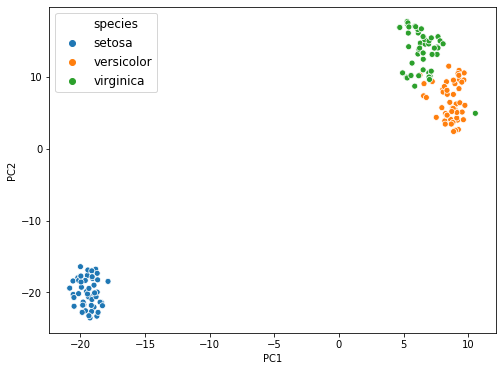

In [143]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = pos , x = "PC1", y = "PC2", hue = "species")
plt.legend(fontsize = 12)
plt.show()

<h4><u>3D Visualization</u></h4>

In [149]:
from mpl_toolkits.mplot3d import Axes3D

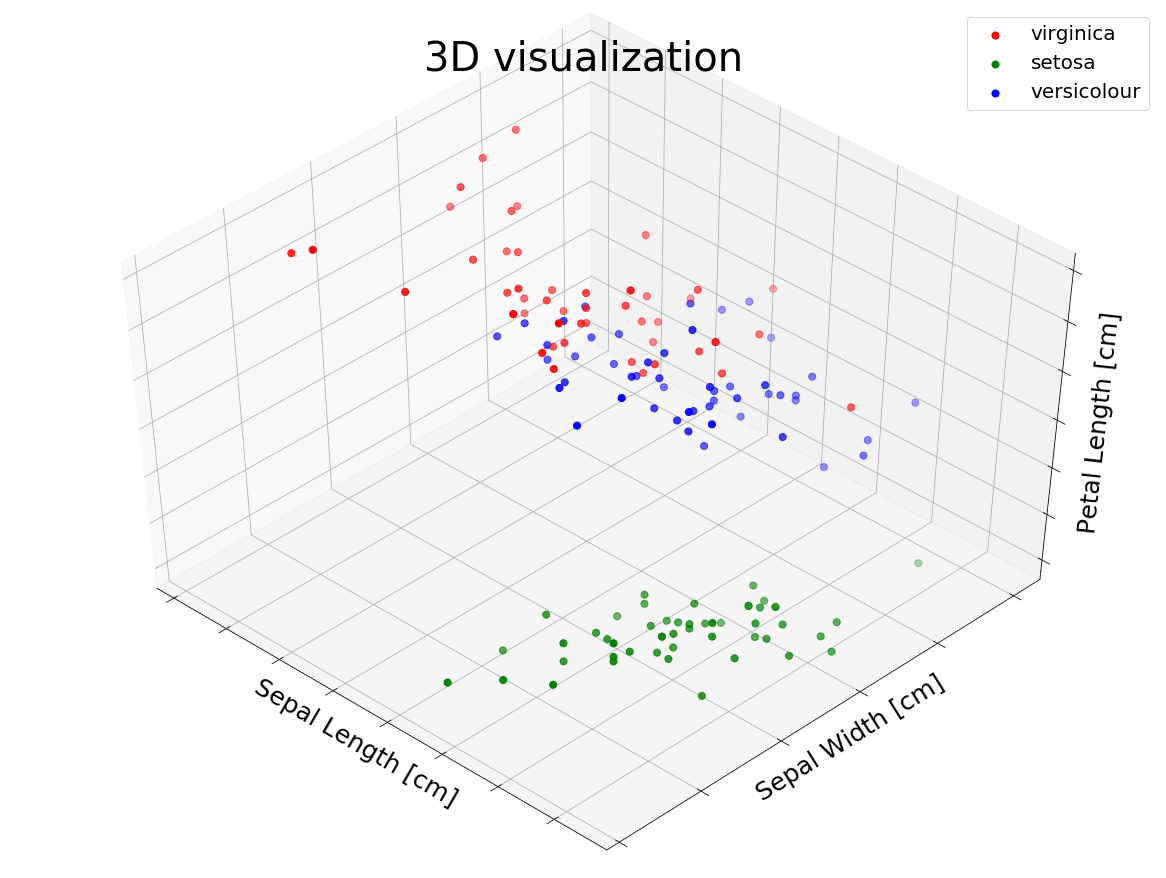

In [197]:
fig = plt.figure(1, figsize=(16, 12))
ax = Axes3D(fig, elev=48, azim=134)
rdata = (df_iris[df_iris["Label"]=="virginica"], df_iris[df_iris["Label"]=="setosa"], df_iris[df_iris["Label"]=="versicolor"])
colors = ("red", "green", "blue")
groups = ("virginica", "setosa", "versicolour") 
# SepalLengthCm 	SepalWidthCm 	PetalLengthCm 	PetalWidthCm
for data, color, group in zip(rdata, colors, groups):
    ax.scatter(data["SepalLengthCm"], data["SepalWidthCm"], data["PetalLengthCm"], 
               c=color, label=group, s=50)
plt.legend(fontsize=20)
ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

<h3>4.Using KNN for classification</h3>

In [201]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [205]:
knn_fit = knn.fit(train_x, train_y)
predict_y = knn.predict(test_x)

In [214]:
from sklearn import metrics

In [221]:
print("ACU SCORE : ", metrics.accuracy_score(test_y, predict_y)*100, "%")
print("===================Report====================")
print(metrics.classification_report(test_y, predict_y))

ACU SCORE :  100.0 %
===================Report====================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



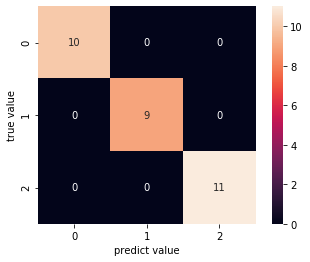

In [216]:
mat = metrics.confusion_matrix(test_y, predict_y)
sns.heatmap(mat,square=True,annot=True,cbar=True)
plt.xlabel("predict value")
plt.ylabel("true value")
plt.show()

<h4><u>cross-validation</u></h4>

In [223]:
from sklearn.model_selection import cross_val_score

In [234]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_X, train_Y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [238]:
cv_scores[0:5]

[0.96,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334]

In [241]:
print("Min Score : ", min(cv_scores))
print("Max Score :", max(cv_scores))

Min Score :  0.9333333333333333
Max Score : 0.9800000000000001


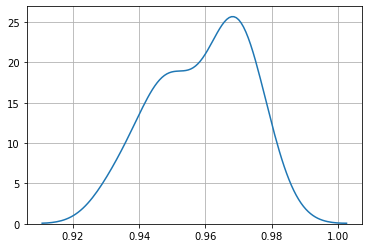

In [237]:
sns.kdeplot(cv_scores)
plt.grid(True)
plt.show()

<h4><u>Missclassification error</u></h4>

In [253]:
MCE = [ 1 - i for i in cv_scores]

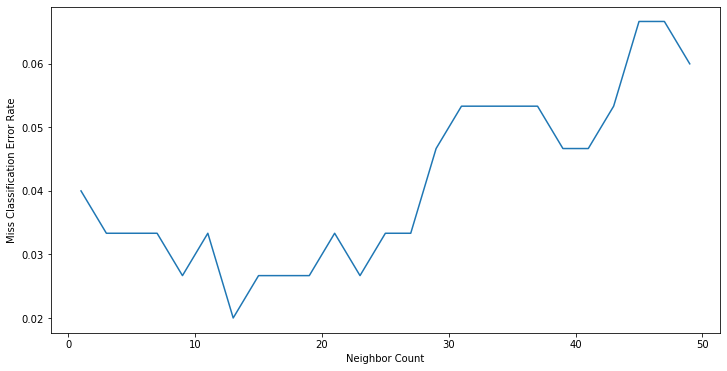

In [254]:
plt.figure(figsize=(12,6))
plt.plot(k_list, MCE)
plt.xlabel("Neighbor Count")
plt.ylabel("Miss Classification Error Rate")
plt.show()

In [258]:
print("Best neighbor : ", k_list[MCE.index(min(MCE))])

Best neighbor :  13
